In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix,
                             accuracy_score)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten,
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, accuracy_score)
# Base Libraries
from tensorflow.keras.applications import  VGG19,EfficientNetB0,VGG16,InceptionV3,ResNet50,EfficientNetB3
from tensorflow.keras.models import Model
from keras.applications.vgg16 import preprocess_input
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Transformation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.pipeline import Pipeline
# Feature Selection


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [ ]:
train2=os.listdir("/content/drive/My Drive/Skindis/train")

In [ ]:
train2

['Scabies Lyme Disease and other Infestations and Bites',
 'Warts Molluscum and other Viral Infections',
 'Urticaria Hives',
 'Vascular Tumors',
 'Seborrheic Keratoses and other Benign Tumors',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Systemic Disease',
 'Vasculitis Photos',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Bullous Disease Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Nail Fungus and other Nail Disease',
 'Eczema Photos',
 'Light Diseases and Disorders of Pigmentation',
 'Herpes HPV and other STDs Photos',
 'Exanthems and Drug Eruptions',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Melanoma Skin Cancer Nevi and Moles',
 'Lupus and other Connective Tissue diseases',
 'Atopic Dermatitis Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Acne and Rosacea Photos']

In [ ]:
cat2=['Eczema Photos']

In [ ]:
cat=[
 'Eczema Photos',
 'Light Diseases and Disorders of Pigmentation',
 'Melanoma Skin Cancer Nevi and Moles',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Acne and Rosacea Photos']

In [ ]:
def data_dictionary():
    path_train="/content/drive/My Drive/Skindis/train/"
    path_test="/content/drive/My Drive/Skindis/test/"
    list_train=cat#os.listdir(path_train)
    list_train1=cat2
    train_dictionary={"image_path":[],"target":[]}
    test_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        path_disease_train=path_train+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j
            if img_path_train!="/kaggle/input/skindatasets/skin/train/Normal/34.avif":

                train_dictionary["image_path"].append(img_path_train)
                train_dictionary['target'].append(k)
        k+=1
    for i in list_train1:
        path_disease_test=path_test+i
        image_list_test=os.listdir(path_disease_test)
        for j in image_list_test:
            img_path_train=path_disease_test+"/"+j
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(4)
    train_df=pd.DataFrame(train_dictionary)
    return  train_df




In [ ]:
train=data_dictionary()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4565 entries, 0 to 4564
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  4565 non-null   object
 1   target      4565 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 71.5+ KB


In [ ]:
import cv2
images=[]
label=[]
for i in train['image_path']:
    if i!="/kaggle/input/skindatasets/skin/train/Normal/34.avif":
        img=cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,(180,180))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #img=cv2.resize(img,(64,64),interpolation=cv2.INTER_AREA)
        #img=resize_and_rescale(img)
        images.append(img)


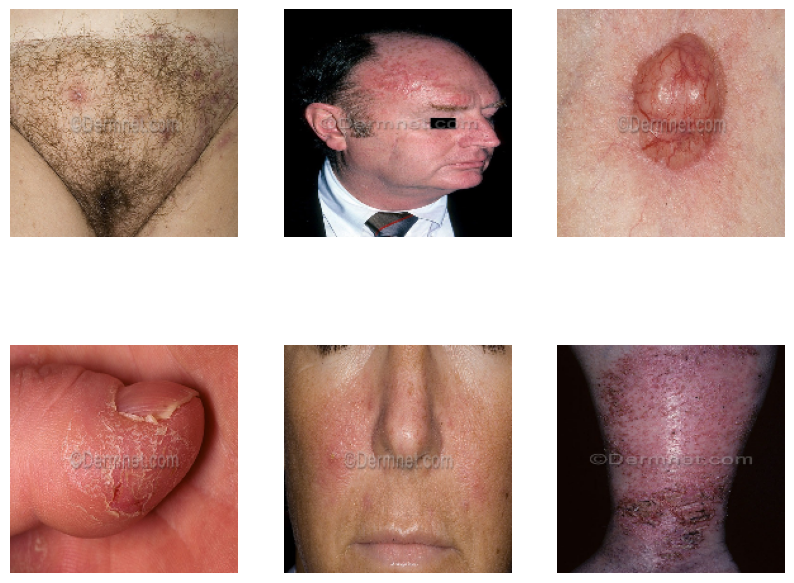

In [ ]:

# Create a list of example inputs to our Gradio demo
example_list = [image for image in random.sample(images, k=6)]

# Plot the images in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

for ax, img_array in zip(axes.ravel(), example_list):
    ax.imshow(img_array)
    ax.axis('off')

plt.show()


In [ ]:
label=train['target']

In [ ]:
len(label)

4565

In [ ]:
len(images)

4565

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=np.array(images)


In [ ]:
label=np.array(label)

In [ ]:
data.shape

(4565, 180, 180, 3)

In [ ]:
label.shape

(4565,)

In [ ]:
!pip install sklearn_relief

In [ ]:
vgg_model = VGG19(weights = 'imagenet',  include_top = False, input_shape = (180, 180, 3))

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
# let's make all layers non-trainable
for layer in vgg_model.layers :
    layer.trainable = False

In [ ]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


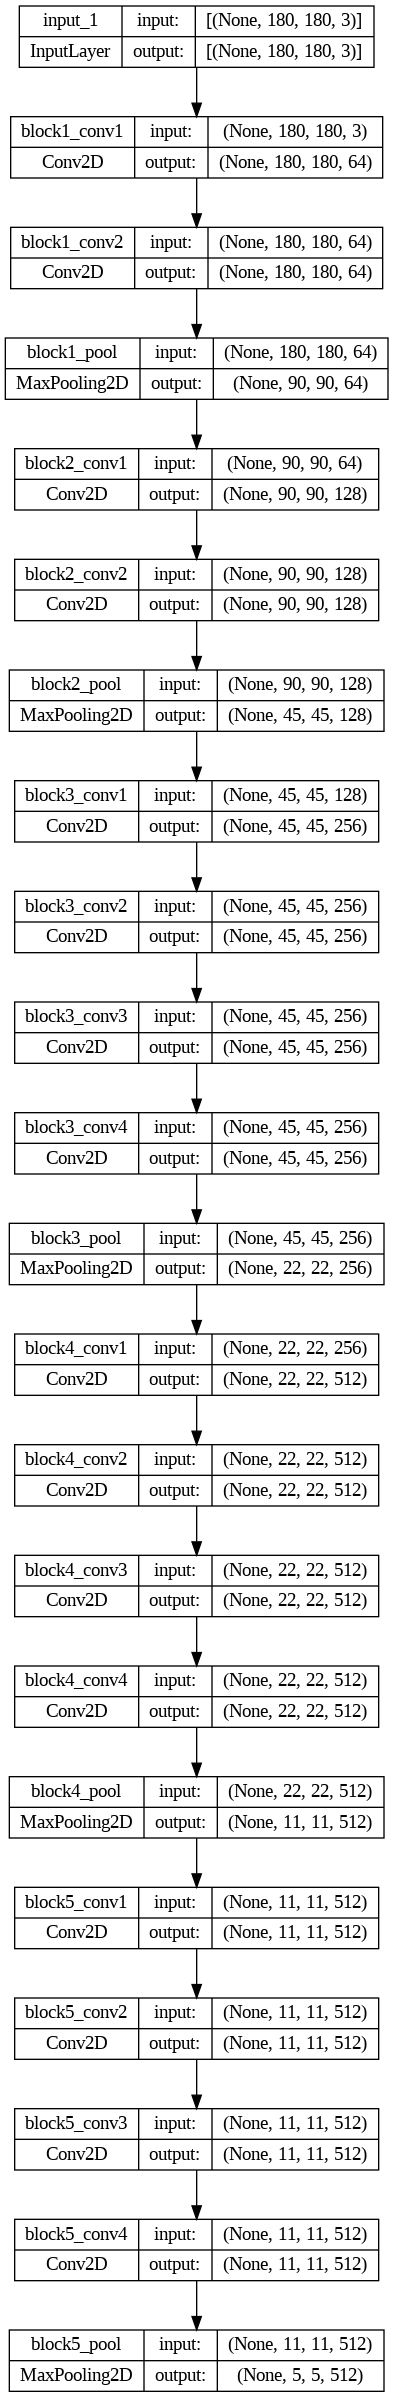

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(vgg_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense


In [ ]:
model=Sequential([

                    Dense(200,activation='relu'),
                  Dense(170,activation='relu'),
                  Dense(6,activation='softmax'),

])

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [ ]:
mcp_save = ModelCheckpoint('EnetB0_CIFAR10_TL.h5', save_best_only=True, monitor='val_acc')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, verbose=1,)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
kf = KFold(n_splits = 3)

In [ ]:
import keras
acc=[]
num_classes = 6
label = keras.utils.to_categorical(label, num_classes)

In [ ]:
label.shape


(4565, 6)

In [ ]:

for i in range(3):
    x_train,x_test, y_train, y_test=train_test_split(data, label, test_size=0.2,random_state = np.random.randint(1,1000, 1)[0])
    print(x_train.shape)
    # let's make all layers non-trainable
    for layer in vgg_model.layers :
        layer.trainable = False
    features_train=vgg_model.predict(x_train)
    features_test=vgg_model.predict(x_test)
    print(features_train.shape)
    num_train=x_train.shape[0]
    num_test=x_test.shape[0]
    print(num_train)
    print(num_test)
    x_test=features_test.reshape(num_test,-1)
    x_train=features_train.reshape(num_train,-1)
    print(x_train.shape)
    print(x_train.shape)
    #x_train,x_valid,y_train,y_valid= train_test_split(x_train, y_train, test_size=0.1,random_state = np.random.randint(1,1000, 1)[0])
#     history=model.fit(x_train,y_train,epochs=15,batch_size=32,verbose=1)
#     model.evaluate(x_test,y_test)

(3652, 180, 180, 3)
29/29 [==============================] - 440s 15s/step
(3652, 5, 5, 512)
3652
913
(3652, 12800)
(3652, 12800)
(3652, 180, 180, 3)
29/29 [==============================] - 445s 15s/step
(3652, 5, 5, 512)
3652
913
(3652, 12800)
(3652, 12800)
(3652, 180, 180, 3)
29/29 [==============================] - 445s 15s/step
(3652, 5, 5, 512)
3652
913
(3652, 12800)
(3652, 12800)


In [ ]:
history = model.fit(x_train, y_train, epochs=30)


Epoch 1/30
115/115 [==============================] - 7s 51ms/step - loss: 3.5959 - accuracy: 0.4518
Epoch 2/30
115/115 [==============================] - 7s 59ms/step - loss: 1.0041 - accuracy: 0.6725
Epoch 3/30
115/115 [==============================] - 9s 81ms/step - loss: 0.6564 - accuracy: 0.7807
Epoch 4/30
115/115 [==============================] - 7s 60ms/step - loss: 0.4023 - accuracy: 0.8716
Epoch 5/30
115/115 [==============================] - 9s 82ms/step - loss: 0.2875 - accuracy: 0.9110
Epoch 6/30
115/115 [==============================] - 8s 69ms/step - loss: 0.2083 - accuracy: 0.9387
Epoch 7/30
115/115 [==============================] - 9s 74ms/step - loss: 0.2981 - accuracy: 0.9170
Epoch 8/30
115/115 [==============================] - 4s 38ms/step - loss: 0.3159 - accuracy: 0.9137
Epoch 9/30
115/115 [==============================] - 5s 46ms/step - loss: 0.2479 - accuracy: 0.9272
Epoch 10/30
115/115 [==============================] - 4s 37ms/step - loss: 0.3020 - accura

In [ ]:
model.save('6claass.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
y_pred=model.predict(x_test)

29/29 [==============================] - 0s 8ms/step


In [ ]:
y_pred2=np.argmax(y_pred, axis=1)
y_pred2

array([3, 2, 0, 0, 0, 4, 3, 0, 0, 0, 4, 4, 4, 0, 1, 1, 3, 0, 3, 1, 0, 0,
       0, 4, 3, 0, 0, 0, 3, 0, 4, 1, 0, 3, 4, 0, 4, 0, 3, 0, 4, 0, 3, 3,
       2, 3, 4, 4, 3, 4, 4, 4, 0, 3, 3, 0, 3, 3, 4, 0, 3, 4, 0, 1, 0, 2,
       0, 3, 0, 0, 3, 4, 1, 4, 0, 4, 3, 4, 4, 1, 4, 4, 3, 0, 3, 0, 0, 3,
       0, 3, 0, 0, 0, 1, 4, 0, 3, 1, 0, 4, 3, 0, 4, 3, 0, 0, 0, 0, 0, 1,
       3, 3, 3, 4, 3, 4, 1, 3, 0, 4, 3, 0, 4, 4, 3, 3, 0, 3, 0, 0, 1, 3,
       4, 4, 3, 1, 0, 0, 1, 0, 4, 0, 0, 4, 3, 2, 3, 4, 0, 3, 0, 3, 0, 4,
       4, 2, 0, 4, 3, 2, 4, 3, 3, 0, 0, 3, 4, 3, 4, 0, 4, 3, 2, 3, 3, 0,
       4, 3, 1, 0, 0, 4, 0, 0, 3, 4, 1, 3, 4, 0, 3, 0, 3, 4, 3, 1, 1, 4,
       3, 1, 3, 0, 0, 0, 0, 1, 0, 0, 4, 4, 4, 3, 4, 3, 3, 4, 4, 3, 3, 0,
       3, 2, 0, 0, 2, 2, 3, 3, 2, 2, 2, 4, 0, 0, 0, 3, 3, 4, 1, 1, 4, 0,
       0, 3, 0, 3, 3, 3, 4, 0, 4, 0, 3, 0, 3, 4, 0, 4, 2, 4, 3, 4, 3, 0,
       1, 3, 3, 0, 3, 0, 3, 0, 3, 2, 4, 0, 2, 0, 1, 0, 3, 0, 4, 1, 1, 0,
       4, 4, 0, 2, 3, 3, 4, 0, 4, 4, 3, 0, 1, 2, 3,

In [ ]:
y_test=np.argmax(y_test, axis=1)

In [ ]:
y_test = np.argmax(y_test)

In [ ]:
y_test.shape

()

In [ ]:
y_test.ndim

0

In [ ]:
y_test

6

In [ ]:
confusion_matrix_result=confusion_matrix(y_test,y_pred2)

TypeError: Singleton array 6 cannot be considered a valid collection.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
plt.title("skin detection  using VGG19 ")

ax= plt.subplot()
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', ax=ax);
pl.show()

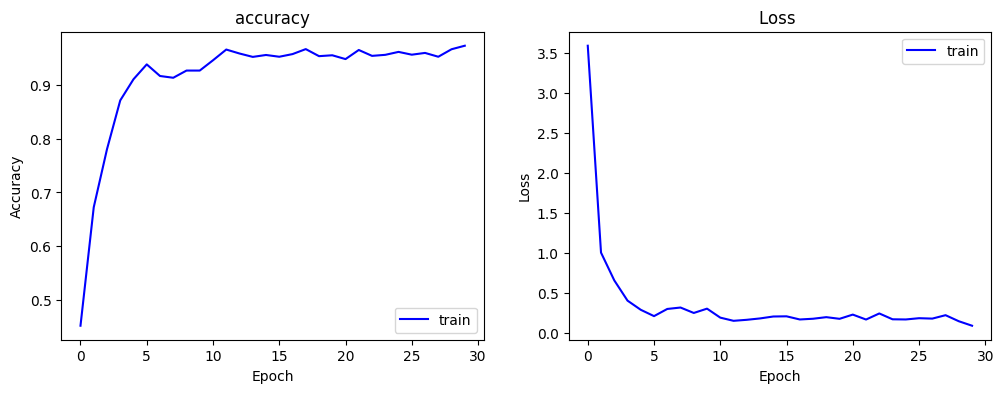

In [ ]:
train_accuracy = history.history['accuracy']
#val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(train_accuracy))
plt.figure(figsize=(12,4))
# Plotting the accuracy
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')

plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')

# Plotting the loss
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, 'b', label='Training loss')

plt.title('Loss ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D,MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import pandas as pd
import tensorflow as tf
import keras
import pickle

In [ ]:
confusion_matrix=classification_report(y_test,y_pred2)

TypeError: Singleton array 6 cannot be considered a valid collection.

In [ ]:
print(confusion_matrix)

In [ ]:
!pip install opencv-python

In [ ]:
import tensorflow as tf
import numpy as np
import cv2

import tensorflow as tf
import numpy as np
import cv2

def predict_skin_disease(image_path):
    # Load saved model
    model = tf.keras.models.load_model('6claass.h5')

    # Load and preprocess image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    img=vgg_model.predict(img)
    img=img.reshape(1,-1)

    # Make prediction on preprocessed image
    pred = model.predict(img)[0]
    predicted_class = np.argmax(pred)

    return predicted_class


print(predict_skin_disease("/content/drive/My Drive/Skindis/test/Eczema Photos/Dyshidrosis-5.jpg"))

1/1 [==============================] - 0s 62ms/step
3


In [ ]:
print(y_train)

[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [ ]:
import tensorflow as tf
import numpy as np
import cv2

def predict_skin_disease(image_path):
    # Define list of class names
    class_names = ['Eczema Photos',
 'Light Diseases and Disorders of Pigmentation',
 'Melanoma Skin Cancer Nevi and Moles',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Acne and Rosacea Photos']

    # Load saved model
    model = tf.keras.models.load_model('6claass.h5')

    # Load and preprocess image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    img = vgg_model.predict(img)
    img = img.reshape(1, -1)

    # Make prediction on preprocessed image
    pred = model.predict(img)[0]
    predicted_class_index = np.argmax(pred)
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

print(predict_skin_disease("/content/drive/MyDrive/Skindis/train/Melanoma Skin Cancer Nevi and Moles/atypical-nevi-dermoscopy-100.jpg"))


1/1 [==============================] - 0s 65ms/step
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
